# ResNet50 Model

In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import pickle
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal Try\\images\\train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal Try\\images\\test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

base_model = ResNet50(weights='imagenet', input_shape=(224, 224, 3), include_top=False)

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)  
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])



Found 463 images belonging to 3 classes.
Found 70 images belonging to 3 classes.


In [14]:
Model_Checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'ResNet50modelsave.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

Epoch 1/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4119 - loss: 17.3188
Epoch 1: val_accuracy improved from -inf to 0.40000, saving model to ResNet50modelsave.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.4143 - loss: 16.8456 - val_accuracy: 0.4000 - val_loss: 1.3909
Epoch 2/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4311 - loss: 1.2429
Epoch 2: val_accuracy did not improve from 0.40000
15/15 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.4331 - loss: 1.2351 - val_accuracy: 0.4000 - val_loss: 1.0544
Epoch 3/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5220 - loss: 0.9298
Epoch 3: val_accuracy did not improve from 0.40000
15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.5200 - loss: 0.9305 - val_accuracy: 0.4000 - val_loss: 1.0962
Epoch 4/300
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4876 - loss: 0.9446
Epoch 4: val_accuracy improved from 0.40000 to 0.48571, saving model to ResNet50modelsave.keras
15/15 ━━━━━━━━━━━━━━━━━━━━

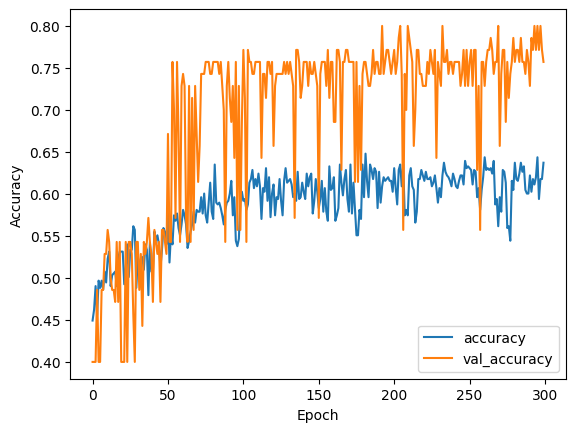

In [15]:
history = model.fit(
    train_generator,
    epochs=300,
    validation_data=validation_generator,
    callbacks=[Model_Checkpoint],
    batch_size=32)

with open('ResNet50training_history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)
    
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

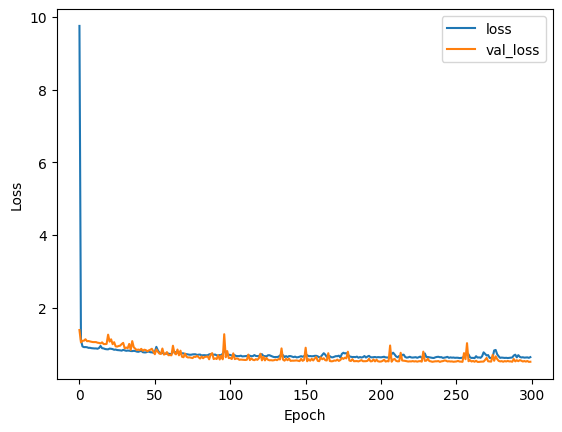

In [16]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
test_generator = test_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal Try\\images\\Test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')
print(f'Test loss: {test_loss:.4f}')

Found 70 images belonging to 3 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 838ms/step - accuracy: 0.7536 - loss: 0.5621
Test accuracy: 75.71%
Test loss: 0.5197


In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_generator.reset()
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step


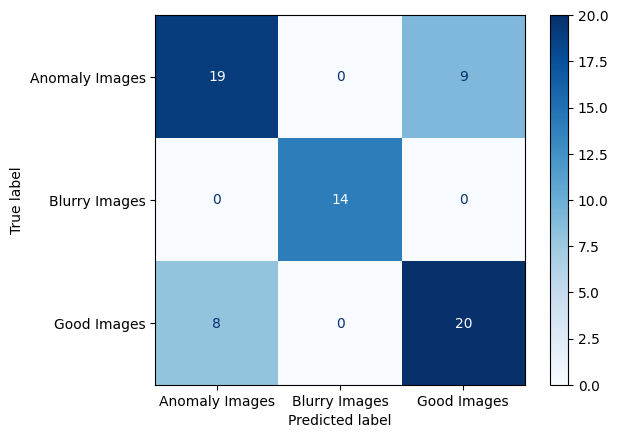

In [20]:
labels = list(test_generator.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()